# Unsprivised Learning 


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv("../../classData.csv")

In [23]:
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


<Figure size 1500x900 with 0 Axes>

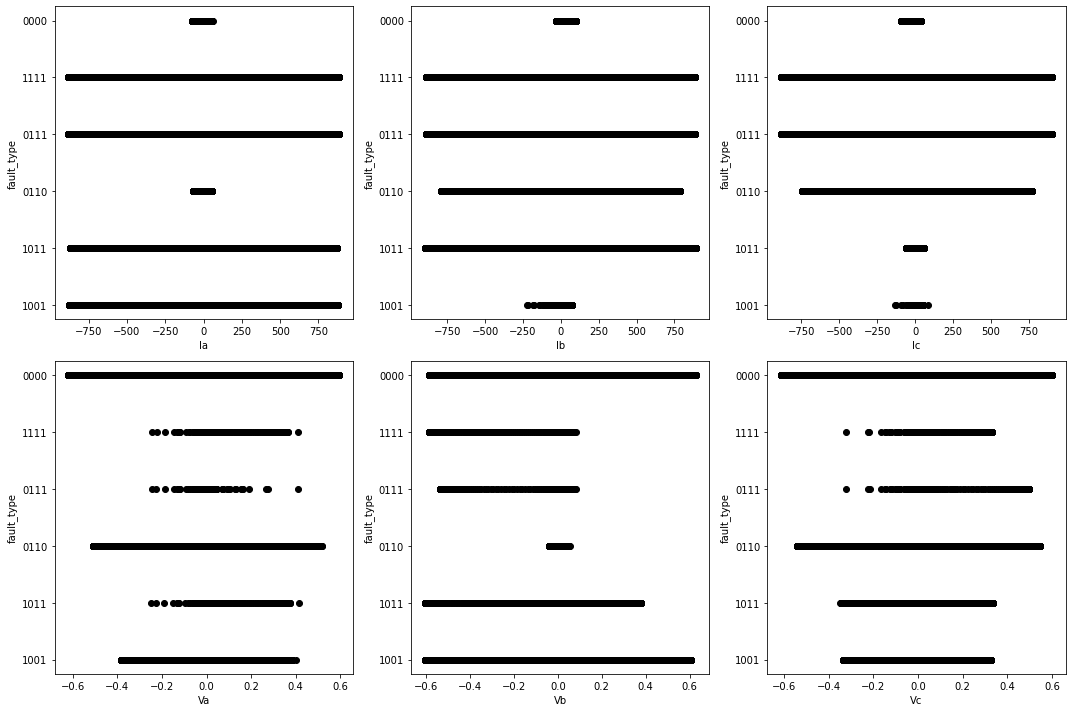

In [33]:
input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
X = df[input_cols]
plt.figure(figsize=(10, 6), dpi=150)  # Bigger size and higher resolution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()

for idx, col in enumerate(input_cols):
    axes[idx].scatter(X[col], df['fault_type'], c='black')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('fault_type')

plt.tight_layout()
plt.show()


In [34]:
# input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
# unique_faults = df['fault_type'].unique()

# colors = plt.cm.get_cmap('tab10', len(unique_faults))

# for in_col in input_cols:
#     plt.figure(figsize=(10, 5))
#     for i, fault in enumerate(unique_faults):
#         subset = df[df['fault_type'] == fault]
#         plt.hist(subset[in_col], bins=30, alpha=0.5, density=True,
#                  label=f'Fault {fault}', color=colors(i))

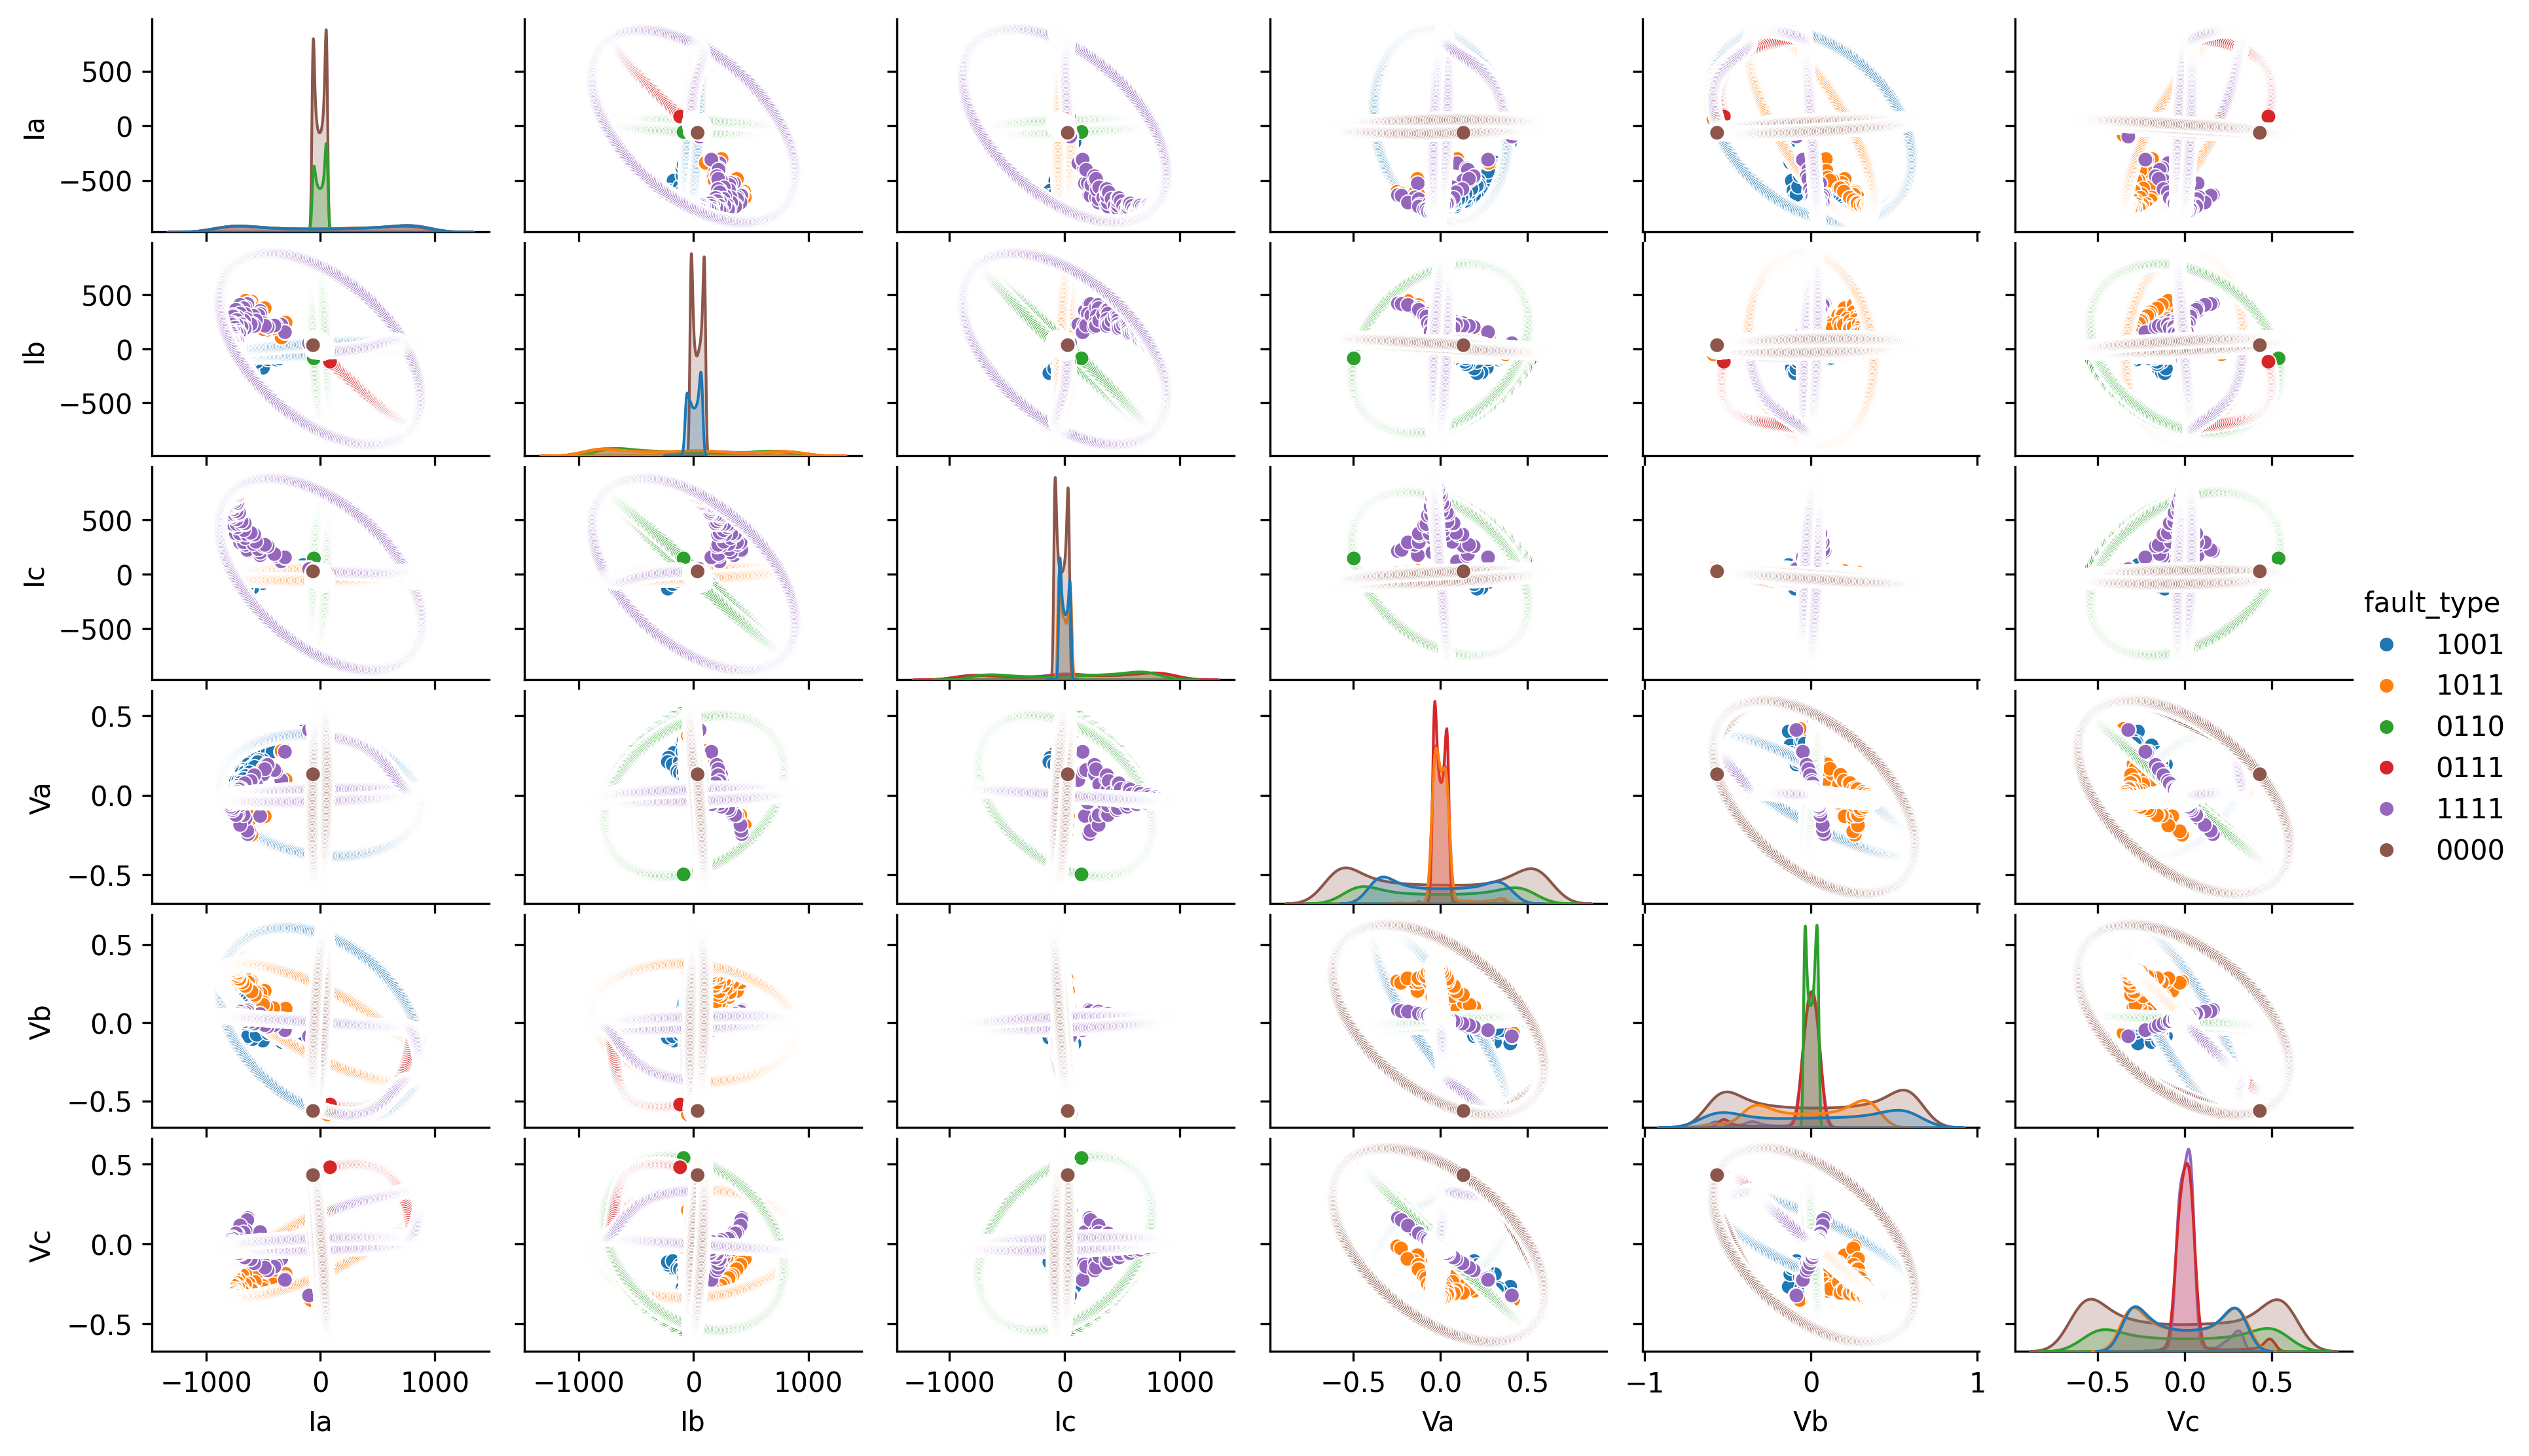

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot
g = sns.pairplot(df, vars=input_cols, hue='fault_type', plot_kws={'s': 30})

# Set high resolution: 3840x2160 at 300 dpi
g.fig.set_size_inches(12.8, 7.2)  # Width, height in inches
g.fig.set_dpi(300)

plt.show()



In [47]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [46]:
def scale_dataset(dataFrame):
    x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    y = dataFrame[['G', 'C', 'B', 'A']].values
    

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    data = np.hstack((x, y))
    y = y.dot(np.array([8, 4, 2, 1]))
    return data , x, y

In [48]:
# print(len(train[train["G"] == 1] ))
# print(len(train[train["G"] == 0] ))
train , X_train , Y_train = scale_dataset(train)
valid , X_valid , Y_valid = scale_dataset(valid)
test , X_test , Y_test = scale_dataset(test)



In [29]:
Y_train

array([ 9,  7,  0, ..., 11,  0,  9], shape=(4716,))

# Models

## KMeans

In [30]:
from sklearn.cluster import KMeans